In [1]:
import pandas as pd
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

 Question-1

In [2]:
df = pd.read_csv(r'C:\Users\Ramachandraiah\Downloads\netflix_titles.csv') #read csv file
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.head() ## Observing the first five records

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"you've", 'itself', "you're", 'me', "wasn't", 'm', "you'll", 'by', 'shan', 'isn', "should've", 'aren', "aren't", 'being', 'nor', 'mightn', 'their', 'he', 'very', 'any', 'too', "hadn't", 'each', 'or', 'hadn', 'through', 'she', 'that', 'were', 'because', 'yourselves', 'have', 'some', 'should', 'who', 'now', 'both', 'is', 'shouldn', 'just', 'while', 'into', "weren't", 'wasn', 'am', 'of', 'so', 'all', 's', 'needn', "mightn't", 'this', 'than', 'yours', 'out', 'my', 'most', 'and', 'such', "that'll", 'if', "wouldn't", 'ourselves', 'was', 'these', 'above', 'then', 'her', 'we', 've', 'as', 'ain', 'which', 'ma', "isn't", 'until', 'again', 'you', "won't", "she's", 'other', 'why', 'same', 'do', 'd', 'couldn', 'on', 'over', 't', 'when', 'here', 'ours', 'i', 'about', 'our', 'your', 'few', 'an', 'no', 'y', 'him', 'will', "haven't", 'down', 'below', 'been', 'theirs', 'once', "needn't", 'but', 'mustn', 'be', 'themselves', 'does', 'himself', 'hasn', 'yourself', 'the', 'haven', 'having', 'it', 'doing', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ramachandraiah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Cleaning the text by performing tokenization, removing the stopwords and preprocessing the text.
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*',text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

df['tokens'] = df['description'].apply(prepare, pipeline=pipeline)

In [6]:
df['tokens']

0       [father, nears, end, life, filmmaker, kirsten,...
1       [crossing, paths, party, cape, town, teen, set...
2       [protect, family, powerful, drug, lord, skille...
3       [feuds, flirtations, toilet, talk, go, among, ...
4       [city, coaching, centers, known, train, india,...
                              ...                        
8802    [political, cartoonist, crime, reporter, pair,...
8803    [living, alone, spooky, town, young, girl, bef...
8804    [looking, survive, world, taken, zombies, dork...
8805    [dragged, civilian, life, former, superhero, m...
8806    [scrappy, poor, boy, worms, way, tycoon, dysfu...
Name: tokens, Length: 8807, dtype: object

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  tokens        8807 non-null   object
dtypes: int64(1), object(12)
memory usage: 894.6+ KB
None


In [8]:
df.dropna(inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tokens
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","[photo, shoot, ghana, american, model, slips, ..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,"[talented, batch, amateur, bakers, face, 10-we..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"[woman, adjusting, life, loss, contends, feist..."
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,"[family, murdered, terrorist, bombing, young, ..."
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,"[father, man, loves, insists, twin, sons, marr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,"[recovering, alcoholic, talal, wakes, inside, ..."
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","[political, cartoonist, crime, reporter, pair,..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"[looking, survive, world, taken, zombies, dork..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","[dragged, civilian, life, former, superhero, m..."


In [ ]:
Question-2

In [9]:
df['description']

7       On a photo shoot in Ghana, an American model s...
8       A talented batch of amateur bakers face off in...
9       A woman adjusting to life after a loss contend...
12      After most of her family is murdered in a terr...
24      When the father of the man she loves insists t...
                              ...                        
8801    Recovering alcoholic Talal wakes up inside a s...
8802    A political cartoonist, a crime reporter and a...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 5332, dtype: object

In [10]:
print(df.describe())

       release_year
count   5332.000000
mean    2012.742123
std        9.625831
min     1942.000000
25%     2011.000000
50%     2016.000000
75%     2018.000000
max     2021.000000


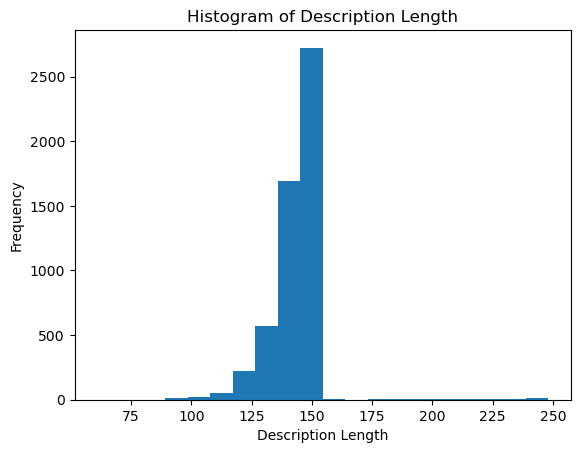

In [11]:
df['Description_Length'] = df['description'].str.len()

# Plot histogram
plt.hist(df['Description_Length'], bins=20)
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.title('Histogram of Description Length')
plt.show()

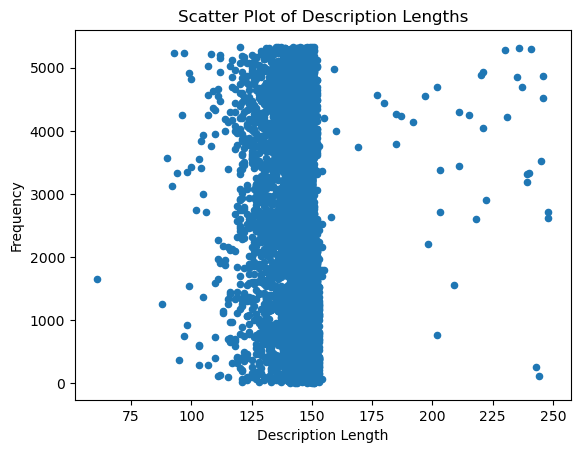

In [12]:

df['Description_Length'] = df['description'].str.len()

# Plot scatter plot
plt.scatter(df['Description_Length'], range(len(df)), s=20)  # Set marker size to 20
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Description Lengths')
plt.show()


In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Question-3

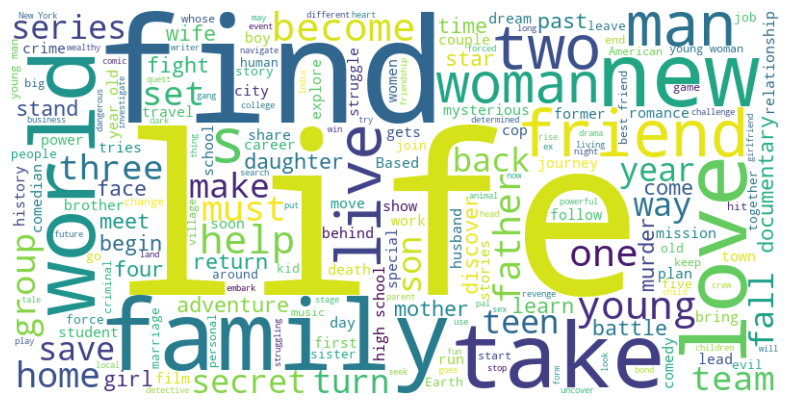

In [14]:
file_path = r'C:\Users\Ramachandraiah\Downloads\netflix_titles.csv'
df = pd.read_csv(file_path)

# Combine all descriptions into a single string
text = ' '.join(df['description'].dropna())

# Create a WordCloud object
wc = WordCloud(background_color='white', width=800, height=400, margin=2)

# Generate the WordCloud
wordcloud = wc.generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
Question-4

In [15]:
import re #importing regular expression module

In [16]:

email_string = "jreddykheerthi9@gmail.com" #defining input string to email_string
pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b' #defining regular expression pattern to match input
result = re.findall(pattern, email_string) #re.findall used to match the pattern of a string
result 

['jreddykheerthi9@gmail.com']


In [17]:
phone_string = "(203) 123-4376" #defining input string to phone_string
pattern = r'\(\d{3}\) \d{3}-\d{4}'#defining regular expression pattern to match input
result = re.findall(pattern, phone_string)#re.findall used to match the pattern of a string
result

['(203) 123-4376']

In [18]:
date_string = "2024-04-27" #defining input string to date_string
pattern = r'\b\d{4}-\d{2}-\d{2}\b' #defining regular expression pattern to match input
result = re.findall(pattern, date_string)#re.findall used to match the pattern of a string
result 

['2024-04-27']

In [19]:
ip_string = "192.168.1.1" #defining input string to ip_string
pattern = r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b' #defining regular expression pattern to match input
result = re.findall(pattern, ip_string)#re.findall used to match the pattern of a string
result 

['192.168.1.1']

In [20]:
special_string = "@DataScience"  #defining input string to special_string
pattern = r'@([A-Za-z0-9_]{1,15})'#defining regular expression pattern to match input
result = re.findall(pattern, twitter_string)#re.findall used to match the pattern of a string
result

['DataScience']


In [ ]:
Question-5

In [21]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [23]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['description'].apply(getSubjectivity)
df['Polarity'] = df['description'].apply(getPolarity)

#Now display data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Subjectivity,Polarity
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1.000000,0.333333
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.000000,0.000000
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0.725000,-0.050000
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0.318687,-0.030505
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0.000000,0.000000
